In [ ]:
Margaret 22nd Nov


In [ ]:
Example Dashboard
=======



## Grouped bar chart with labels
This example shows how to create a grouped bar chart and how to annotate bars with labels.

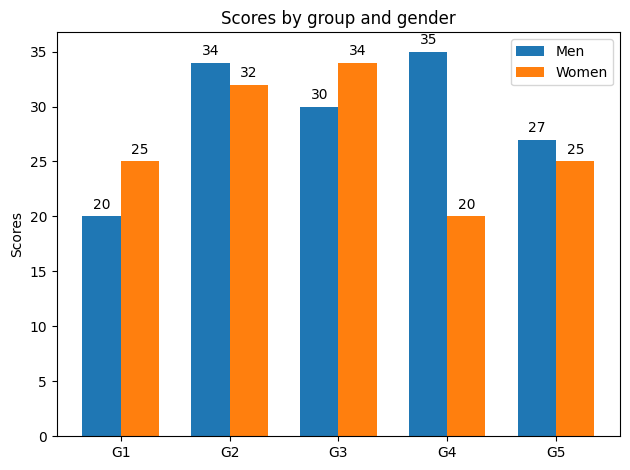

In [14]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Box plot vs. violin plot comparison

Note that although violin plots are closely related to Tukey's (1977) box plots, they add useful information such as the distribution of the sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile range as outliers above or below the whiskers whereas violin plots show the whole range of the data.

A good general reference on boxplots and their history can be found here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great section: https://scikit-learn.org/stable/modules/density.html

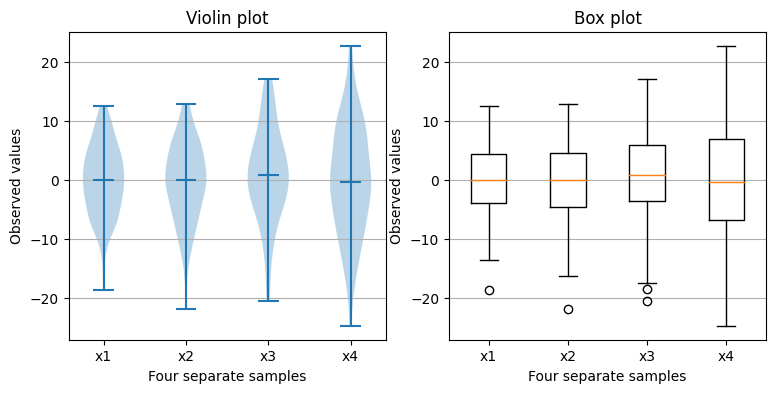

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

## Streamplot
A stream plot, or streamline plot, is used to display 2D vector fields. This example shows a few features of the <b>streamplot</b> function:

-  Varying the color along a streamline.

-  Varying the density of streamlines.

-  Varying the line width along a streamline.

-  Controlling the starting points of streamlines.

-  Streamlines skipping masked regions and NaN values.

-  Unbroken streamlines even when exceeding the limit of lines within a single grid cell.

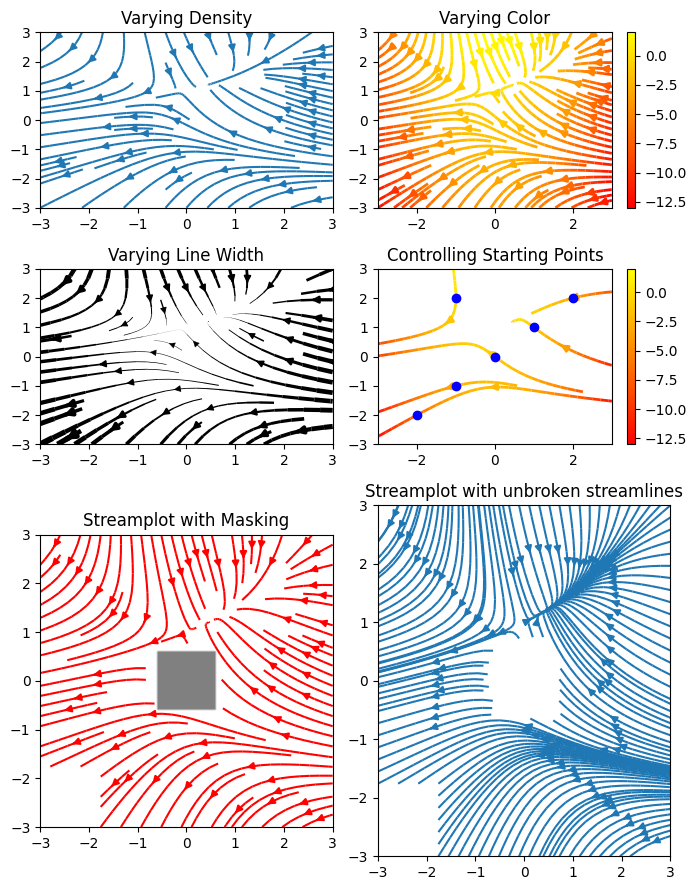

In [12]:
import numpy as np
import matplotlib.pyplot as plt


w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig, axs = plt.subplots(3, 2, figsize=(7, 9), height_ratios=[1, 1, 2])
axs = axs.flat

#  Varying density along a streamline
axs[0].streamplot(X, Y, U, V, density=[0.5, 1])
axs[0].set_title('Varying Density')

# Varying color along a streamline
strm = axs[1].streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
axs[1].set_title('Varying Color')

#  Varying line width along a streamline
lw = 5*speed / speed.max()
axs[2].streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
axs[2].set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

strm = axs[3].streamplot(X, Y, U, V, color=U, linewidth=2,
                         cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
axs[3].set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
axs[3].plot(seed_points[0], seed_points[1], 'bo')
axs[3].set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

axs[4].streamplot(X, Y, U, V, color='r')
axs[4].set_title('Streamplot with Masking')

axs[4].imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray',
              aspect='auto')
axs[4].set_aspect('equal')

axs[5].streamplot(X, Y, U, V, broken_streamlines=False)
axs[5].set_title('Streamplot with unbroken streamlines')

plt.tight_layout()
plt.show()